In [67]:
import numpy as np
import matplotlib.pylab as plt
import sys
import pandas as pd

In [68]:
tIter = 20
num_train = 500
m_weights = (0.2,0.5,0.3)


cov = np.matrix([[1,0],[0,1]])
m1 = np.array([0,0])
m2 = np.array([3,0])
m3 = np.array([0,3])
g1 = np.random.multivariate_normal(m1,cov,num_train)
g2 = np.random.multivariate_normal(m2,cov,num_train)
g3 = np.random.multivariate_normal(m3,cov,num_train)



In [69]:

mix_choice = np.random.choice(range(3), size = num_train, p = m_weights)
train_data = np.concatenate((g1[mix_choice == 0,:],
                             g2[mix_choice == 1,:],
                             g3[mix_choice == 2,:]
                            ))

In [70]:
def closestC(data, centers):
    leastSquares =  np.sum(np.power((centers - data),2), axis = 1)
    selMin = np.argmin(leastSquares)
    return (selMin, leastSquares[selMin])
    
    

In [71]:
def trainCluster(tIter, data, centers, k):
    cObjectiveArr = []
    for t in range(0,tIter):
        c = np.apply_along_axis(closestC, 1, data, centers)
        cSum = np.sum(c[:,1])
        cObjectiveArr.append(cSum)
        
    
        for i in range (0,k):
            centers[i] = np.mean(data[c[:,0] == i], axis = 0)
        
    
    return cObjectiveArr, c
        

[]
[[0.39965214 0.15392631]
 [0.58442354 0.5838027 ]]
[[0.96463148 0.29949321]
 [0.1463913  0.45051488]
 [0.09452194 0.68903153]]
[[0.77511935 0.2936322 ]
 [0.5331158  0.46469667]
 [0.52948272 0.70286391]
 [0.09600492 0.50193479]]
[[0.67124067 0.53119392]
 [0.41020922 0.90451274]
 [0.21128876 0.78421124]
 [0.23779905 0.79526805]
 [0.17281173 0.47251119]]


C:\Users\maa48\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\maa48\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


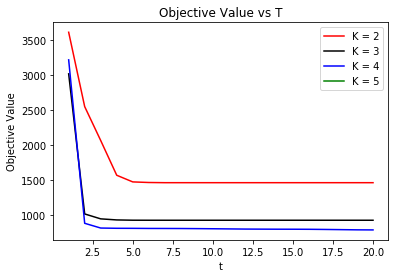

In [72]:
kvalarr = [2,3,4,5]
clusterAssignArr = []
clusterObjective = []
print(clusterAssignArr)

plt.figure()

lines = ['red','black','blue','green', 'yellow']

for i in range(0,4):
    clusterCenter = np.random.uniform(low = 0, high = 1, size = (kvalarr[i], 2))
    print(clusterCenter)
    result = trainCluster(tIter, train_data, clusterCenter, kvalarr[i])
    clusterObjective.append(result[0])
    clusterAssignArr.append(result[1][:,0])
    plt.plot(range(1,tIter + 1), clusterObjective[i], lines[i] )


plt.xlabel('t')
plt.ylabel('Objective Value')
plt.title('Objective Value vs T')
plt.legend(['K = 2','K = 3','K = 4','K = 5']) 
plt.savefig("kobj.png")
plt.show()
    

4


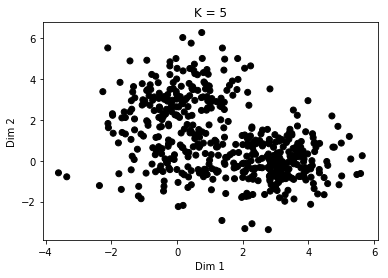

In [73]:
plt.figure()
print(len(clusterAssignArr))
# 2 = 3 in this case
colors_arr = [lines[int(x)] for x in clusterAssignArr[3]]
plt.scatter(train_data[:,0], train_data[:,1], c=colors_arr)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.title("K = 5")
plt.savefig("K5.png")

In [74]:
# Matrix Factorization 
numUsers = 943
numMovies = 1682
var = 0.25
d = 10
lamb = 1

ratings_train = np.genfromtxt('hw4-data/ratings.csv', delimiter = ',')
ratings_test  = np.genfromtxt('hw4-data/ratings_test.csv', delimiter = ',')
with open('hw4-data/movies.txt') as f:
    metadata = np.array([x.rstrip('\n') for x in f.readlines()])
print(metadata)
temp = np.zeros((numUsers, numMovies))
mat = np.full_like(temp, np.nan, dtype = np.float)
print(mat)


['Toy Story (1995)' 'GoldenEye (1995)' 'Four Rooms (1995)' ...
 'Sliding Doors (1998)' 'You So Crazy (1994)'
 'Scream of Stone (Schrei aus Stein) (1991)']
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [75]:
def matPop(matrix, file):
    trc = 0
    tec = 0
    with open(file) as f:
        for row in f:
            val = row.rstrip('\n').split(',')
            matrix[int(val[0])-1, int(val[1])-1] = float(val[2])
            
        return matrix
        


In [76]:


matTrain = matPop(mat, 'hw4-data/ratings.csv')
matTest = matPop(mat, 'hw4-data/ratings_test.csv')
print(matTrain.shape)

totalTestCases = 5000
print(totalTestCases)


(943, 1682)
5000


In [77]:
def createData(numUsers,numMovies, d, lamb):
    tempQ = np.zeros((numUsers,int(d)))
    Q = np.full_like(tempQ, np.nan, dtype = np.float)
    #Q = np.repeat(np.nan,numUsers * d).reshape(numUsers, d)

    R = np.transpose(np.random.multivariate_normal(np.zeros(d), np.divide(np.identity(d), lamb), numMovies))
    #R = np.random.multivariate_normal(np.repeat(0, d), np.identity(d)/lamb, numMovies).T
    
   
    return Q,R
    
    

In [78]:
Qtest, Rtest = createData(numUsers, numMovies, d, lamb)
print(Rtest.shape)

(10, 1682)


In [79]:
def error_calc(Q,R,M):
    pred = np.dot(Q,R)
    nonNan = ~np.isnan(M)
    e =  np.sum((M[nonNan] - pred[nonNan])**2)
    return e


In [80]:
def squareSum(M):
    val = np.sum(np.power(M,2))
    return val

In [81]:
def matAlg(numUsers, numMovies, M, Mt, Q, R, lamb, var, d):
    objective = []
    
    for p in range(0,100):
        for i in range(0, numUsers):
            nonNan = ~np.isnan(M[i,:])
            Ri = R[:,nonNan]
            Mi = M[i,nonNan]
            first = np.dot(Ri, Ri.T) + lamb * var * np.identity(d)
            last = np.dot(Ri, Mi.T)
            Q[i,:] = np.dot(np.linalg.inv(first), last)

        for j in range(0, numMovies):
            nonNan = ~np.isnan(M[:,j])
            Qj = Q[nonNan,:]
            Mj = M[nonNan,j]
            firstJ = np.dot(Qj.T, Qj) + lamb * var * np.identity(d)
            lastJ = np.dot(Qj.T, Mj.T)
            R[:,j] =  np.dot(np.linalg.inv(firstJ), lastJ)

        if p>1:
            negobj1 = error_calc(Q,R,M)/(2*var)
            negobj2 = squareSum(Q)*lamb/2
            negobj3 = squareSum(R)*lamb/2
            negObjVal = negobj1 + negobj2 + negobj3
            objective.append(-negObjVal)
            
    return objective, Q, R
            
            
            
            

In [82]:
def update(selMov, numMovies, movies, R, movVal, distRes):
    for m in selMov:
        mId = [x for x in range(numMovies) if m in movies[x]][0]
        dist =  np.sqrt((np.power((R[:,mId].reshape(-1,1) - R),2)).sum(axis=0))
        minId = np.argsort(dist)[1:11]
        movVal[m] = movies[minId]
        distRes[m] = dist[minId]
    return movVal, distRes
        
    

                                        My Fair Lady  \
0  Return of Martin Guerre, The (Retour de Martin...   
1        Winnie the Pooh and the Blustery Day (1968)   
2                                Mary Poppins (1964)   
3                                     Sabrina (1954)   
4                         Sound of Music, The (1965)   
5                            Jungle Book, The (1994)   
6                            Parent Trap, The (1961)   
7                                  Cinderella (1950)   
8                         Singin' in the Rain (1952)   
9                        Beauty and the Beast (1991)   

                                        Star Wars  \
0                 Empire Strikes Back, The (1980)   
1                  Raiders of the Lost Ark (1981)   
2                       Return of the Jedi (1983)   
3                                Toy Story (1995)   
4       Indiana Jones and the Last Crusade (1989)   
5                      Usual Suspects, The (1995)   
6           

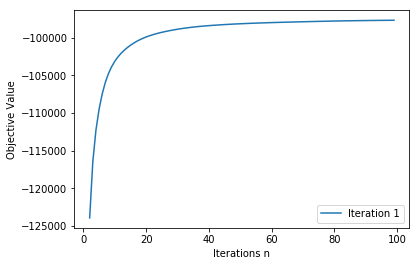

    n objVal testRsme
0   1 -97679  3.04913
1   2    NaN      NaN
2   3    NaN      NaN
3   4    NaN      NaN
4   5    NaN      NaN
5   6    NaN      NaN
6   7    NaN      NaN
7   8    NaN      NaN
8   9    NaN      NaN
9  10    NaN      NaN


In [83]:
# Map est

nIter = 10
xVals = list(range(2,100))
min_obj = -np.inf
objective = []

data = pd.DataFrame(index=range(nIter), columns=['n','objVal','testRsme'])
selMov = ["My Fair Lady", "Star Wars",  "GoodFellas"]
movVal = pd.DataFrame(index=range(10), columns= selMov)
distRes = pd.DataFrame(index=range(10), columns= selMov)

data['n'] = list(range(1,nIter +1))

plt.figure()

for i in range(0,nIter):
    Q,R = createData(numUsers,numMovies, d, lamb)
    objective, Q, R = matAlg(numUsers, numMovies, matTrain, matTest, Q, R, lamb, var, d)
    labelStr = "Iteration " + str(i + 1)
    plt.plot(xVals, objective, label= labelStr)
    lastObj = objective[-1]
    data.loc[i,'objVal'] = lastObj
    #check if len mat test work
    data.loc[i,'testRsme'] = np.sqrt(error_calc(Q, R, matTest)/totalTestCases)
    
    if(min_obj < lastObj):
        min_obj = lastObj
        movVal, distRes =update(selMov, numMovies, metadata, R, movVal, distRes)

print(movVal)
print(distRes)
plt.xlabel("Iterations n")
plt.ylabel('Objective Value')                                         
plt.legend()
plt.show()
print(data)